# Random Forest


The random forest algorithm combines multiple decision trees. The idea is to maximize the generalization performance. Each decision tree is trained on a bootstrap sample of size n (randomly choose n examples from the training dataset **with replacement**). Here only d features are selected randomly. This is repeated k times. The prediction of each tree is aggregated and the class label is determined by majority vote.

In [45]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

Import data.

In [34]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

Split data.

In [35]:
X_train, y_train = train.iloc[:, :-1], train.iloc[:, -1]
X_test, y_test = test.iloc[:, :-1], test.iloc[:, -1]

In [46]:
forest = RandomForestClassifier(random_state=10)
param_grid = {
    "n_estimators": list(range(100, 600, 100)),
    "max_depth": list(range(1, 21))
}

grid_search = GridSearchCV(forest, param_grid, cv=40, scoring='accuracy')
grid_search.fit(X_train, y_train)

/Users/Alexander/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 13 members, which is less than n_splits=40.
  warnings.warn(


GridSearchCV(cv=40, estimator=RandomForestClassifier(random_state=10),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='accuracy')

In [47]:
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'max_depth': 6, 'n_estimators': 400}
Best score:  0.725


Get all results in a table.

In [51]:
table = pd.concat([pd.DataFrame(grid_search.cv_results_["params"]),
                   pd.DataFrame(grid_search.cv_results_["mean_test_score"],
                                columns=["Accuracy"])],
                                axis=1)
table

,max_depth,n_estimators,Accuracy
0,1,100,0.71875
1,1,200,0.71875
2,1,300,0.71875
3,1,400,0.71875
4,1,500,0.71875
...,...,...,...
95,20,100,0.68125
96,20,200,0.69375
97,20,300,0.69375
98,20,400,0.68750


Now the model is trained with the best hyperparameters.

In [52]:
forest = RandomForestClassifier(n_estimators=400,
                                random_state=10,
                                max_depth=6)

In [53]:
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, n_estimators=400, random_state=10)

In [54]:
predictions = forest.predict(X_test)

The random forest has a lower accuracy than the single decision tree. Compared to the decision tree it doesn't classify drug B at all and also misclassifies drug A more often.

In [55]:
c = classification_report(y_test, predictions)
print(c)

              precision    recall  f1-score   support

           A       0.20      0.20      0.20         5
           B       0.00      0.00      0.00         3
           C       0.00      0.00      0.00         3
           X       0.54      0.64      0.58        11
           Y       1.00      1.00      1.00        18

    accuracy                           0.65        40
   macro avg       0.35      0.37      0.36        40
weighted avg       0.62      0.65      0.64        40



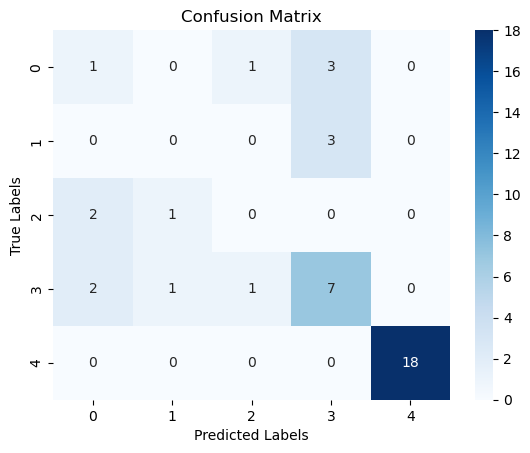

In [58]:
cm = confusion_matrix(y_test, predictions)

sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()